교재 : p183~

In [1]:

import os, shutil

# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = './cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './cats_and_dogs_small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [2]:
import tensorflow as  tf
import tensorflow.keras as keras

In [28]:
# 폴더에서 이미지 파일을 읽고 수치데이터로 인코딩 해주는 도구  (교재 p189)
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_gen = train_gen.flow_from_directory( train_dir ,
                                          target_size=(150,150),  # 모든 이미지 크기를 150X150 으로 변경
                                          batch_size=20, #한번에 읽을 이미지 개수
                                          class_mode = 'binary'  # y값을 반환해 주는 모드 (이진분류)
                                          )

validation_gen = test_gen.flow_from_directory(  validation_dir ,
                                                target_size=(150,150),  # 모든 이미지 크기를 150X150 으로 변경
                                                batch_size=20, #한번에 읽을 이미지 개수
                                                class_mode = 'binary'  # y값을 반환해 주는 모드 (이진분류)
                                                )                                                       

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [29]:
for X_batch, y_batch in train_gen:
    print(X_batch.shape, y_batch.shape)
    break

(20, 150, 150, 3) (20,)


In [30]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(kernel_size=(3,3), filters=32,
                              input_shape=(150,150,3),
                              activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Conv2D(kernel_size=(3,3), filters=64,                              
                              activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Conv2D(kernel_size=(3,3), filters=128,                              
                              activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Conv2D(kernel_size=(3,3), filters=128,                              
                              activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Flatten())   # 7 X 7 X 128 
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 분류:softmax , 이중분류 : sigmoid 사용

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [32]:
model.compile(loss='binary_crossentropy',     #다중분류시 categorical_crossentropy 사용
               optimizer="rmsprop",
               metrics=['accuracy'])

In [33]:
model.fit_generator(train_gen,
                    steps_per_epoch=100,   # 100*20 == 2000
                    epochs=30,
                    validation_data=validation_gen,
                    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 59s 594ms/step - loss: 0.7182 - accuracy: 0.5250 - val_loss: 0.6880 - val_accuracy: 0.5020
Epoch 2/30
100/100 [==============================] - 58s 583ms/step - loss: 0.6758 - accuracy: 0.6030 - val_loss: 0.6325 - val_accuracy: 0.6750
Epoch 3/30
100/100 [==============================] - 58s 583ms/step - loss: 0.6143 - accuracy: 0.6655 - val_loss: 0.5979 - val_accuracy: 0.6590
Epoch 4/30
100/100 [==============================] - 58s 584ms/step - loss: 0.5785 - accuracy: 0.6935 - val_loss: 0.5522 - val_accuracy: 0.7150
Epoch 5/30
100/100 [==============================] - 59s 587ms/step - loss: 0.5089 - accuracy: 0.7495 - val_loss: 0.5885 - val_accuracy: 0.7040
Epoch 6/30
100/100 [==============================] - 58s 585ms/step - loss: 0.4761 - accuracy: 0.7665 - val_loss: 0.6168 - val_accuracy: 0.6870
Epoch 7/30
100/100 [==============================] - 58s 584ms/step - loss: 0.4162 - accuracy: 0.8155 - val_loss: 0.6495 - val_ac

In [20]:
data_gen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,   #40도 회전
    width_shift_range=0.2, # 너비 평행 이동
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
# i=0

# for fname in os.listdir(train_cats_dir):
#     print(fname)
#     i += 1
#     if i == 4: break

cat.0.jpg
cat.1.jpg
cat.10.jpg
cat.100.jpg


In [24]:
fnames = [os.path.join(train_cats_dir, fname)for fname in os.listdir(train_cats_dir)]
# print(fnames[:4])

img = keras.preprocessing.image.load_img(fnames[3], target_size=(150, 150))
x = keras.preprocessing.image.img_to_array(img)
print(x.shape)
x = x.reshape(1, 150, 150, 3)    # x.reshape((1,) + x.shape)
print(x.shape)

(150, 150, 3)
(1, 150, 150, 3)


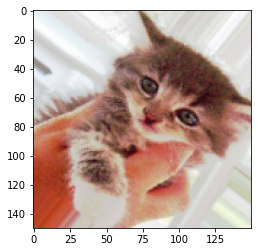

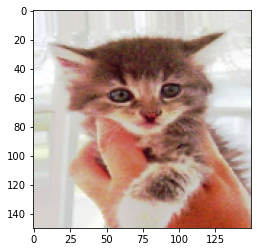

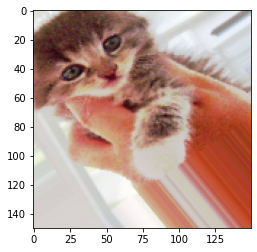

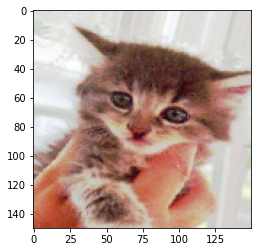

In [25]:
import matplotlib.pyplot as plt

i=0
for batch in data_gen.flow(x, batch_size=1):
    i += 1
    plt.figure(i)
    plt.imshow(keras.preprocessing.image.array_to_img(batch[0]))
    if i == 4 : break

In [34]:
# 훈련데이터에 대해서 증식 기능 적용
train_gen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,   #40도 회전
    width_shift_range=0.2, # 너비 평행 이동
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_gen = train_gen.flow_from_directory( train_dir ,
                                          target_size=(150,150),  # 모든 이미지 크기를 150X150 으로 변경
                                          batch_size=20, #한번에 읽을 이미지 개수
                                          class_mode = 'binary'  # y값을 반환해 주는 모드 (이진분류)
                                          )

validation_gen = test_gen.flow_from_directory(  validation_dir ,
                                                target_size=(150,150),  # 모든 이미지 크기를 150X150 으로 변경
                                                batch_size=20, #한번에 읽을 이미지 개수
                                                class_mode = 'binary'  # y값을 반환해 주는 모드 (이진분류)
                                                )                                  

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [37]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(kernel_size=(3,3), filters=32,
                              input_shape=(150,150,3),
                              activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Conv2D(kernel_size=(3,3), filters=64,                              
                              activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Conv2D(kernel_size=(3,3), filters=128,                              
                              activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Conv2D(kernel_size=(3,3), filters=128,                              
                              activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Flatten())   # 7 X 7 X 128 
model.add(keras.layers.Dropout(0.5))   # 과대적합 해소 
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 분류:softmax , 이중분류 : sigmoid 사용


#########################################

model.compile(loss='binary_crossentropy',     #다중분류시 categorical_crossentropy 사용
               optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
               metrics=['accuracy'])

####################################

model.fit(train_gen,
          steps_per_epoch=100,   # 100*20 == 2000
          epochs=100,
          validation_data=validation_gen,
          validation_steps=50)

Epoch 1/100
100/100 [==============================] - 71s 710ms/step - loss: 0.6945 - accuracy: 0.5105 - val_loss: 0.6870 - val_accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - 61s 606ms/step - loss: 0.6863 - accuracy: 0.5450 - val_loss: 0.6659 - val_accuracy: 0.6060
Epoch 3/100
100/100 [==============================] - 60s 596ms/step - loss: 0.6726 - accuracy: 0.5805 - val_loss: 0.6989 - val_accuracy: 0.5480
Epoch 4/100
100/100 [==============================] - 66s 657ms/step - loss: 0.6613 - accuracy: 0.5950 - val_loss: 0.6476 - val_accuracy: 0.6150
Epoch 5/100
100/100 [==============================] - 72s 724ms/step - loss: 0.6486 - accuracy: 0.6075 - val_loss: 0.6456 - val_accuracy: 0.6090
Epoch 6/100
100/100 [==============================] - 69s 694ms/step - loss: 0.6257 - accuracy: 0.6455 - val_loss: 0.6134 - val_accuracy: 0.6470
Epoch 7/100
100/100 [==============================] - 68s 681ms/step - loss: 0.6175 - accuracy: 0.6545 - val_loss: 0.6070 -